# Week 13 - Interface

This week, you'll be revisiting a database (such as our example, gathered from Tweepy) and exploring methods for visualizing the data to others. Your exercise should:

- Import or collect your data as appropriate, using OS or an API
- Make and structure your data in a Pandas dataframe
- Use NLTK to tokenize the data, and chart a word cloud
- Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
- Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

Consider exploring other visualization types in the Bokeh API documentation, and play with the color options and scale of your visualization.

## Import or Collect Data

I will use Tweepy and the hashtag #NationalEntrepreneursDay.  I may find insight to a paper I am currently working on about business ethics.
The stream ran for 10 minutes.

In [2]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [3]:
import tweepy
import csv 

class StdOutListener(tweepy.Stream):
    def on_status(self, status):
        
        user = status.author.screen_name
        location = status.user.location
        timeTweet = status.created_at
        source = status.source
        tweet = status.text
        writer.writerow([tweet,timeTweet,user,location,source])

In [5]:
def start_streaming():
     
        with open("nedtweets.csv", 'w', encoding="utf-8", errors="ignore") as file:
            global writer
            writer = csv.writer(file)

           
            writer.writerow(["Tweet", "Date", "User","Location","Source"])

            
            try:
                listener = StdOutListener(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'], CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])
                listener.filter(track=["#NationalEntrepreneursDay"])  
            except KeyboardInterrupt:
                #User pressed ctrl+c or cmd+c -- get ready to exit the program
                print("- KeyboardInterrupt caught. Closing stream and exiting.")
                listener.disconnect()
                pass 

In [6]:
start_streaming()

- KeyboardInterrupt caught. Closing stream and exiting.


## Structure Data as Pandas Dataframe

In [5]:
import pandas as pd

df_tweets = pd.read_csv("nedtweets.csv")

In [6]:
df_tweets.head()

,Tweet,Date,User,Location,Source
0,Happy National Entrepreneurs’ Day from GSA OSD...,2021-11-16 16:30:00+00:00,GSAOSDBU,"Washington, DC",Twitter Web App
1,today is 'National Entrepreneurs Day' which is...,2021-11-16 16:30:13+00:00,tm4smallbiz,"Falls Church, VA",Twitter Web App
2,"Melanie Nuce, SVP at GS1 US, provides insight ...",2021-11-16 16:30:18+00:00,GS1_US,"Ewing, NJ",Hootsuite Inc.
3,Happy #NationalEntrepreneursDay! \r\n\r\nVisit...,2021-11-16 16:30:20+00:00,TIBAProgram,"San Antonio, Texas, USA",Buffer
4,"RT @twilio: Our journey began on a pizza box, ...",2021-11-16 16:30:33+00:00,jeffiel,"San Francisco, CA",Twitter for iPhone


## Use NLT and Create Word Cloud

In [7]:

import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [8]:

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [9]:
cleaned_tweets = []
for i in range(0,len(df_tweets['Tweet'])):
    cleaned_tweets.append(cleaning_tweets((df_tweets.Tweet[i])))
print(cleaned_tweets[0:50])

['happy national entrepreneurs day from gsa osdbu recognize the effort smallbusiness entrepreneurs put', 'today national entrepreneurs day which wonderful just don tell the publishers entrepreneur magazine', 'melanie nuce svp gs1 provides insight into how emerging brands can connect more directly with customers thr', 'happy nationalentrepreneursday visit our website learn how help foreign entrepreneurs open their busin', 'our journey began pizza box can yours comment your million dollar business ideas below and send pizzas', 'rosey cocktails and landmines they all the origin story roomba nationalentrepreneursday when recogni', 'most uta entrepreneurs choose build their companies here within the dfw area 2022 mavs 100 nominations open', 'today nationalentrepreneursday emphasize the ongoing need support america entrepreneurs with policies that', 'happy nationalentrepreneursday all the amazing innovators visionaries problem solvers get work wit', 'most uta entrepreneurs choose build their

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["today","day","entrepreneur","entrepreneurs","nationalentrepreneursday"])

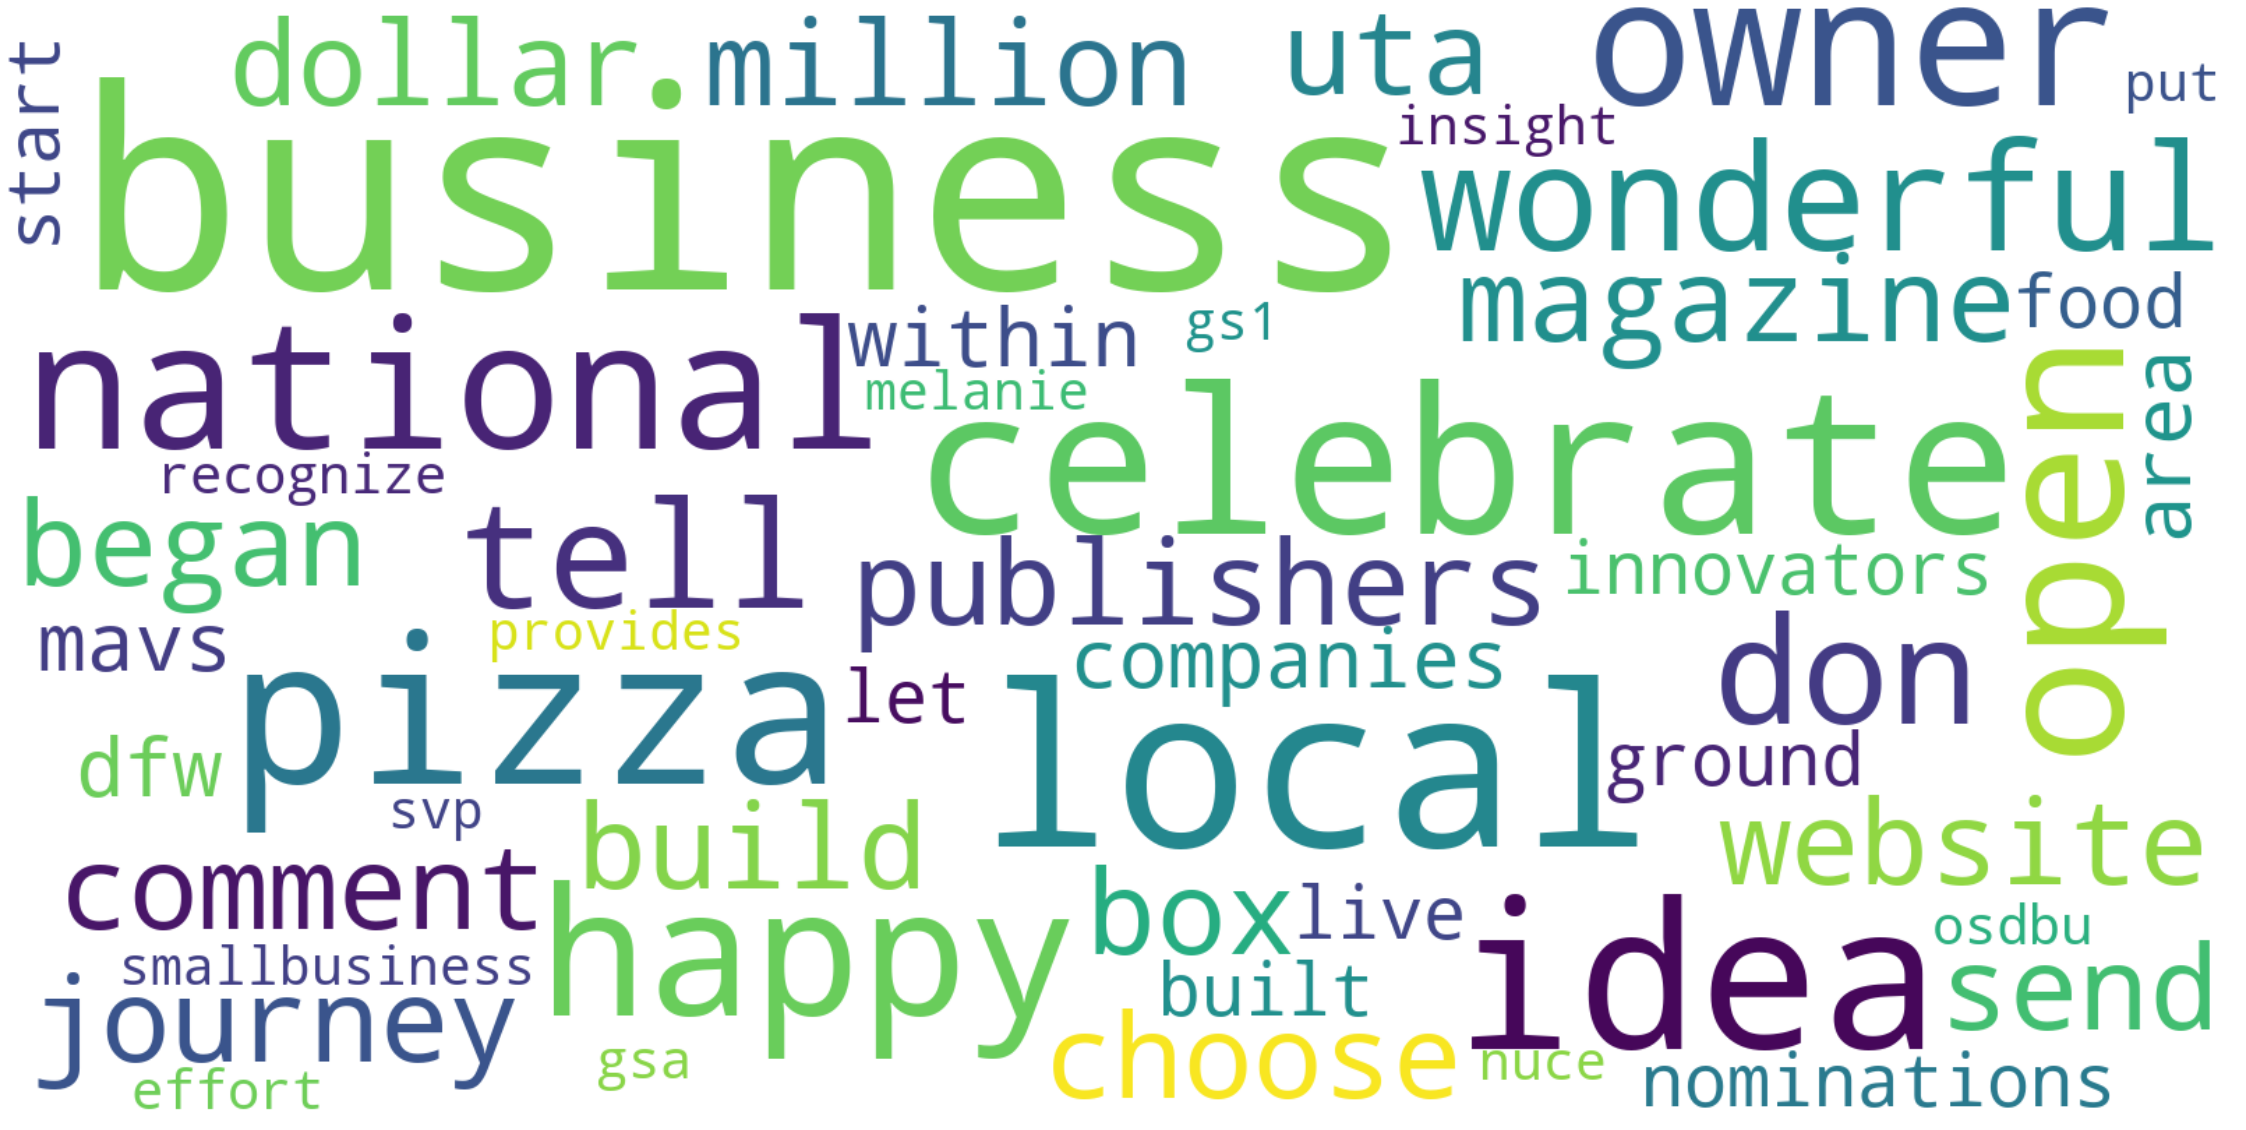

In [11]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud of Interest

I tried several images.  The best result came from the money bag image.

In [12]:

import numpy as np
from PIL import Image
import random

In [13]:

mask = np.array(Image.open('./moneybag.jfif'))

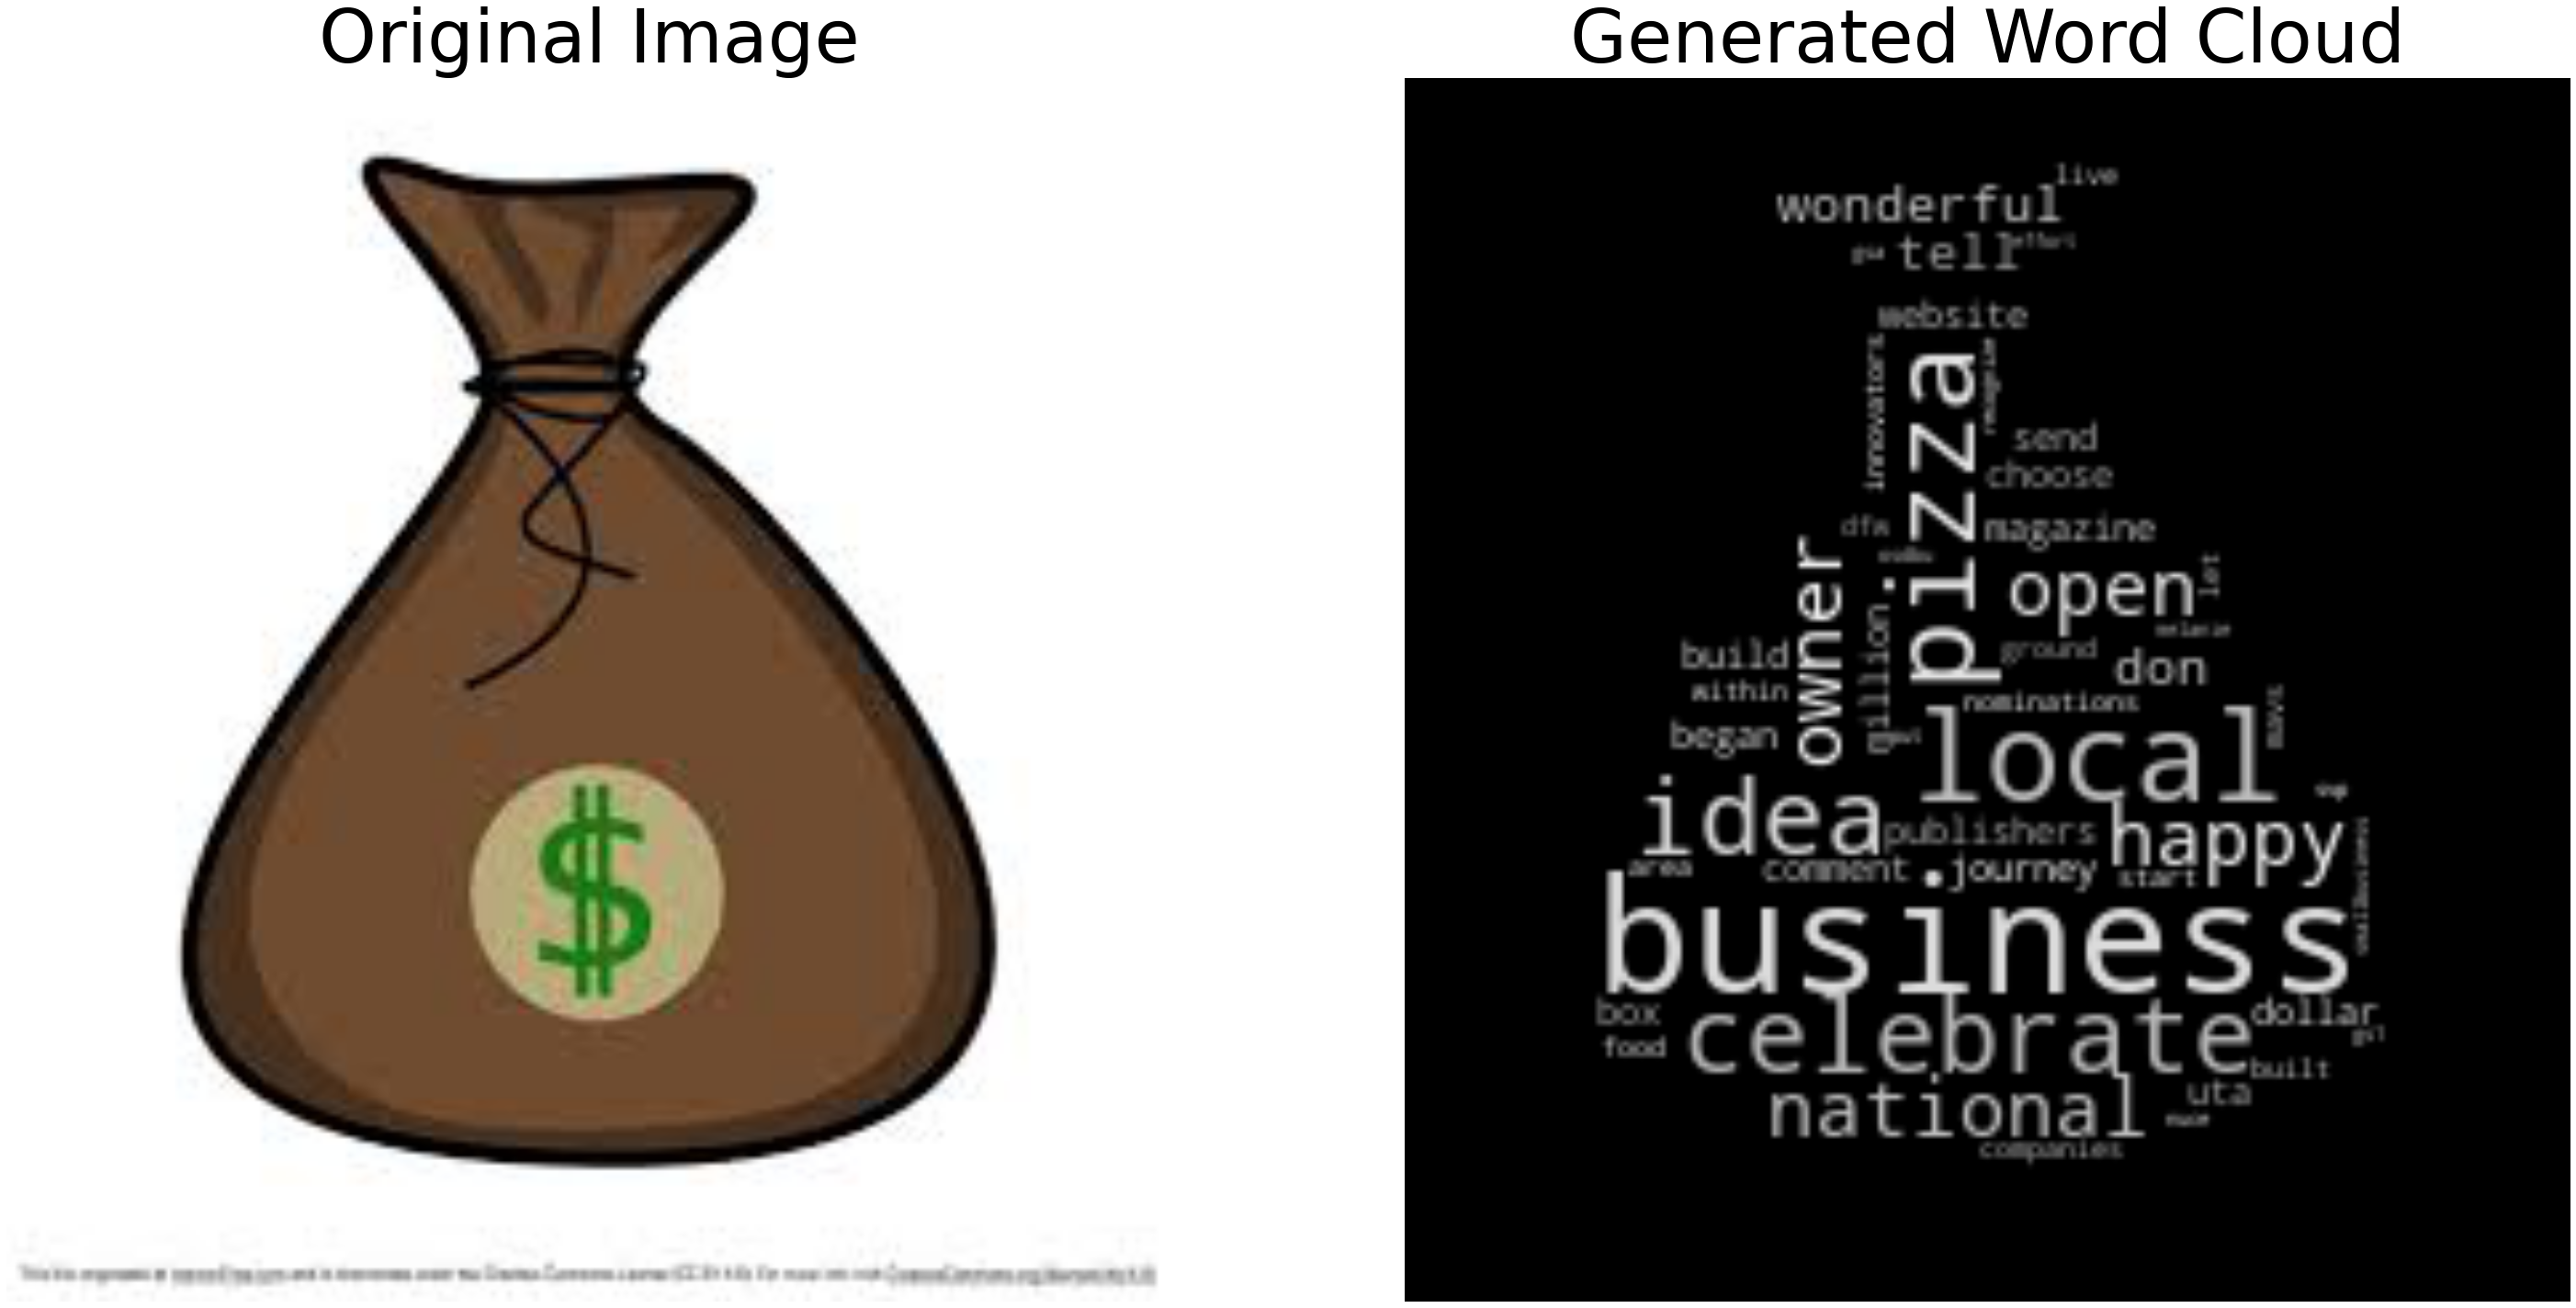

In [14]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()

## Sentiment Analysis with Bokeh

In [15]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

sid = SentimentIntensityAnalyzer()

In [16]:
def calculate_sentiment(text):
    
    scores = sid.polarity_scores(text)
    
    compound_score = scores['compound']
    
    return compound_score

In [17]:

df_tweets['Sentiment Score'] = df_tweets['Tweet'].apply(calculate_sentiment)
df_tweets.sort_values(by='Sentiment Score', ascending=False)[:15]

,Tweet,Date,User,Location,Source,Sentiment Score
8,Happy #NationalEntrepreneursDay to all of the ...,2021-11-16 16:31:41+00:00,TheOutpostTeam,"Washington, DC",Twitter Web App,0.8176
21,The future is bright! #NationalEntrepreneursDa...,2021-11-16 16:38:32+00:00,books_lhunt,NaN,Twitter Web App,0.8065
22,This #NationalEntrepreneursDay we want to take...,2021-11-16 16:38:48+00:00,WilsonDutraLaw,"Jacksonville, FL",Buffer,0.8020
10,It’s #NationalEntrepreneursDay and I’m excited...,2021-11-16 16:33:15+00:00,dalila_says,NaN,Twitter Web App,0.7906
3,Happy #NationalEntrepreneursDay! \r\n\r\nVisit...,2021-11-16 16:30:20+00:00,TIBAProgram,"San Antonio, Texas, USA",Buffer,0.7712
16,RT @swetavikram: Today is #NationalEntrepreneu...,2021-11-16 16:35:38+00:00,FlyFemFounders,"New York, NY",Twitter for iPhone,0.7430
17,"It's #NationalEntrepreneursDay in the US, but ...",2021-11-16 16:36:05+00:00,swspublishing,"Ipswich, England",Twitter for Android,0.7351
0,Happy National Entrepreneurs’ Day from GSA OSD...,2021-11-16 16:30:00+00:00,GSAOSDBU,"Washington, DC",Twitter Web App,0.6114
14,Let's celebrate all the local business owners ...,2021-11-16 16:35:07+00:00,TMTCrystalLake,NaN,Buffer,0.6114
15,Let's celebrate all the local business owners ...,2021-11-16 16:35:35+00:00,TMTNorthAurora,"North Aurora, IL",Buffer,0.6114


In [18]:

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import RdGy9
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter

#file for output
output_file(filename="ned.html", title="National Entrepreneurs Day Twitter Visualization")

In [19]:

import math
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
p = figure(plot_height=1000, plot_width=1000, toolbar_location=None)
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, color='red')

p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'National Entrepreneurs Day Tweets'
p.xaxis.axis_label = 'Dates'
p.yaxis.axis_label = 'Sentiment Score'

In [20]:
hover = HoverTool()
hover.tooltips=[
    ('Tweet', '@Tweet')
]

p.add_tools(hover)

output_notebook()

Loading BokehJS ...

In [21]:
show(p)

In [22]:
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap

output_file("with_colors.html", title="Visual Styling - National Etnrepreneurs Day Tweets")

In [23]:
from bokeh.models.tools import PanTool, WheelZoomTool

df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
mapper = linear_cmap(field_name='Sentiment Score', palette=RdGy9 ,low=-1 ,high=1)

p = figure(plot_height=500, plot_width=500, toolbar_location="below")
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'National Entrepreneurs Day Tweets'
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Sentiment Score'

In [24]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Tweet: </b>
@Tweet
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...